# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- **Nama:** Novanni Indi Pradana
- **Email:** Pradanawae23@gmail.com
- **ID Dicoding:** pradanain

# 1. Persiapan

## 1.1 Business Understanding

### Latar Belakang
Universitas merupakan lembaga pendidikan tinggi yang berperan besar dalam mencetak sumber daya manusia yang berkualitas. Namun, salah satu tantangan yang terus dihadapi oleh banyak institusi pendidikan tinggi adalah tingginya angka mahasiswa yang tidak menyelesaikan studi mereka, atau yang dikenal dengan istilah dropout.

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Tren dropout di pendidikan tinggi telah menjadi perhatian serius dalam beberapa tahun terakhir. Banyak faktor yang dapat mempengaruhi kelulusan atau dropout mahasiswa, mulai dari latar belakang sosio-ekonomi, performa akademik awal, hingga kondisi keluarga dan motivasi belajar.

Jika intitusi dapat mengidentifikasi mahasiswa yang berpotensi mengalami dropout sejak awal, maka tindakan preventif seperti bimbingan akademik atau dukungan psikologis dapat segera diberikan untuk meningkatkan angka kelulusan.

### Tujuan Proyek
Tujuan dari proyek ini adalah untuk membantu Jaya Jaya Institut dalam:
- Mengidentifikasi faktor-faktor utama yang mempengaruhi status akhir mahasiswa (Dropout, Graduate, Enrolled).
- Memprediksi status mahasiswa sejak awal masuk menggunakan model klasifikasi machine learning.
- Menyediakan insight berbasis data kepada pihak manajemen untuk membantu pengambilan keputusan strategis dalam meningkatkan kualitas pendidikan dan layanan mahasiswa.

### Problem Statement
Bagaimana kita dapat menggunakan data pendaftaran dan karakteristik mahasiswa untuk:
- Menganalisis faktor-faktor penyebab utama dropout atau ketidaklulusan?
- Memprediksi status akhir mahasiswa (Dropout, Graduate, atau masih Enrolled) sejak awal pendaftaran?
- Memberikan intervensi tepat waktu terhadap mahasiswa yang berisiko tinggi mengalami dropout?

### Sasaran Bisnis (Business Goals)
- Mengurangi angka dropout mahasiswa pada tahun ajaran mendatang.
- Meningkatkan efisiensi alokasi sumber daya untuk layanan bimbingan dan konseling berdasarkan prediksi risiko dropout.
- Memberikan rekomendasi strategi retensi mahasiswa kepada pihak akademik dan administrasi.

### Sasaran Data Science (Data Science Goals)
- Melakukan eksplorasi dan visualisasi terhadap karakteristik mahasiswa berdasarkan status akhirnya.
- Membangun model klasifikasi yang mampu memprediksi status mahasiswa (Dropout, Graduate, Enrolled) dengan akurasi yang baik dan interpretasi yang jelas.
- Menyediakan laporan dan dashboard untuk membantu manajemen dalam mengambil keputusan berbasis data.

### Solution Statements
- Proyek ini akan menggunakan teknik supervised learning (klasifikasi) untuk membangun model prediktif berdasarkan fitur-fitur mahasiswa saat awal pendaftaran.
- Model akan dievaluasi menggunakan metrik seperti akurasi, precision, recall, dan F1-score, serta visualisasi confusion matrix untuk interpretabilitas.
- Hasil dari model akan digunakan untuk menyarankan kebijakan intervensi terhadap mahasiswa berisiko tinggi.

### Cakupan Proyek
- Preprocessing data: Membersihkan data mahasiswa, menangani missing values, mengubah format variabel, serta melakukan encoding untuk variabel kategorikal.
- Eksplorasi Data (EDA): Menganalisis distribusi fitur demografis, akademik, dan sosio-ekonomi serta korelasinya dengan status mahasiswa.
- Feature Engineering: Membuat fitur tambahan yang relevan, seperti indeks prestasi atau kategori umur, untuk meningkatkan performa model.
- Modeling: Membangun dan membandingkan beberapa model klasifikasi (misalnya Logistic Regression, Random Forest, dan XGBoost) untuk memprediksi status mahasiswa (Dropout, Graduate, Enrolled).
- Evaluasi: Menilai performa model menggunakan metrik klasifikasi yang sesuai (akurasi, precision, recall, F1-score, dan confusion matrix).
- Visualisasi dan Dashboard: Membuat dashboard interaktif untuk monitoring hasil prediksi dan insight penting terkait faktor-faktor yang memengaruhi status mahasiswa.
- Deployment: Membangun aplikasi sederhana (misalnya menggunakan Streamlit) untuk melakukan prediksi status mahasiswa berbasis input data.

### Sumber Data
Dataset yang digunakan adalah "Students Performance" yang berasal dari proyek "Belajar Penerapan Data Science" dari platform Dicoding.

Link dataset: https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance


## 1.2 Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

from imblearn.over_sampling import SMOTE
from collections import Counter

import joblib
import json

## 1.3 Menyiapkan data yang akan diguankan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/dicoding/students_performance/data.csv"
df = pd.read_csv(path, sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Understanding

## 2.1 Memahami Struktur Data

In [ ]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (4424, 37)


Dataset memiliki 4424 baris dan 37 kolom, yang menunjukkan jumlah observasi (mahasiswa) dan fitur (atribut) yang tersedia untuk dianalisis.

Setiap baris merepresentasikan data satu mahasiswa Fitur mencakup informasi demografis, akademik, sosial ekonomi, dan status akademik mahasiswa.

In [ ]:
display(df.head())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2.2 Melihat Tipe Data

In [ ]:
print("\nInfo Data:")
df.info()


Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 

## 2.3 Mengecek Missing Values

In [ ]:
print("\nJumlah missing values:")
print(df.isnull().sum())


Jumlah missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment         

Tidak terdapat missing values pada data.

## 2.4 Mengecek Duplikasi Data

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah data duplikat: {duplicate_rows.shape[0]}")

Jumlah data duplikat: 0


Tidak terdapat data duplikat pada dataset.

## 2.5 Statistik Deskriptif

In [ ]:
print("\nDeskripsi data numerik:")
display(df.describe())


Deskripsi data numerik:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


1. Marital_status

  Nilai berkisar dari 1 hingga 6. Mean = 1.18, artinya mayoritas mahasiswa berstatus 1 (kemungkinan besar "Single").

2. Application_mode & Application_order
  
  Application_mode: cara mendaftar, bervariasi antara 1–57. Banyak kategori menunjukkan berbagai jalur pendaftaran.
  Application_order: urutan preferensi saat mendaftar. Mean = 1.72, jadi mayoritas mendaftar di urutan awal.

3. Course
  
  Nilai unik tinggi (min=33, max=9991), menunjukkan banyak program studi berbeda. Ini kemungkinan akan dikategorikan atau diencoding.

4. Daytime_evening_attendance
  
  Nilai 0 dan 1, menunjukkan kelas siang vs malam.Mean = 0.89 → mayoritas mengikuti kelas siang.

5. Previous_qualification & Previous_qualification_grade

  Nilai 1–43 untuk jenis kualifikasi sebelumnya, dan grade sebelumnya berkisar 95–190.
  Grade rata-rata cukup tinggi (mean = 132.61), menunjukkan populasi mahasiswa cenderung akademis.

6. Nacionality

  Nilai unik tinggi (1–109), akan berguna untuk melihat pengaruh latar belakang negara asal terhadap kelulusan.

7. Parents' Qualification & Occupation

  Kategori numerik dari pendidikan dan pekerjaan orang tua (1–44). Mean mendekati kategori menengah (sekitar 19–22), bisa dikaitkan dengan status sosio-ekonomi.

8. Admission_grade
  
  Nilai masuk berkisar antara 0–200 (mean = 127.3), penting untuk korelasi dengan performa akademik.

9. Debtor & Tuition_fees_up_to_date
  
  Biner (0 dan 1). Informasi apakah mahasiswa punya tunggakan atau tidak. Mean Tuition_fees_up_to_date = 0.88, artinya sebagian besar mahasiswa tidak menunggak.

10. Gender
  
  0 = laki-laki, 1 = perempuan. Mean = 0.64 → mayoritas perempuan.

11. Age_at_enrollment
  
  Rentang usia mahasiswa saat masuk, penting untuk melihat kaitan usia dan dropout.

12. Curricular_units (1st & 2nd Semester)
  
  Banyak fitur terkait evaluasi akademik: jumlah mata kuliah, evaluasi, yang lulus, nilai rata-rata. Nilai minimum = 0, maksimum = 33 mata kuliah dalam satu semester. Mean grade sem.1 = 10.2 & sem.2 = 10.2 → cukup rendah, jika skala 0–20 ini berarti pas-pasan.

13. Unemployment_rate, Inflation_rate, dan GDP
  
  Faktor ekonomi makro yang mungkin memengaruhi dropout. Unemployment mean = 11.5%, bisa jadi tekanan eksternal bagi mahasiswa. GDP rata-rata rendah (mean mendekati nol), bisa jadi karena format atau skala tidak standar.



## 2.6 Distribusi Data

In [ ]:
# DIstribusi fitur numerik
numerical_cols = df.select_dtypes(include='number').columns

# Tampilkan skewness
skew_vals = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness Tiap Fitur Numerik:")
print(skew_vals)

Skewness Tiap Fitur Numerik:
Nacionality                                     10.703998
Educational_special_needs                        9.154976
Curricular_units_1st_sem_without_evaluations     8.207403
Curricular_units_2nd_sem_without_evaluations     7.267701
International                                    6.104830
Fathers_occupation                               5.395173
Mothers_occupation                               5.339227
Curricular_units_2nd_sem_credited                4.634820
Marital_status                                   4.399764
Curricular_units_1st_sem_credited                4.169049
Previous_qualification                           2.871207
Debtor                                           2.434652
Age_at_enrollment                                2.054988
Application_order                                1.881050
Curricular_units_1st_sem_enrolled                1.619041
Scholarship_holder                               1.164871
Curricular_units_1st_sem_evaluations       

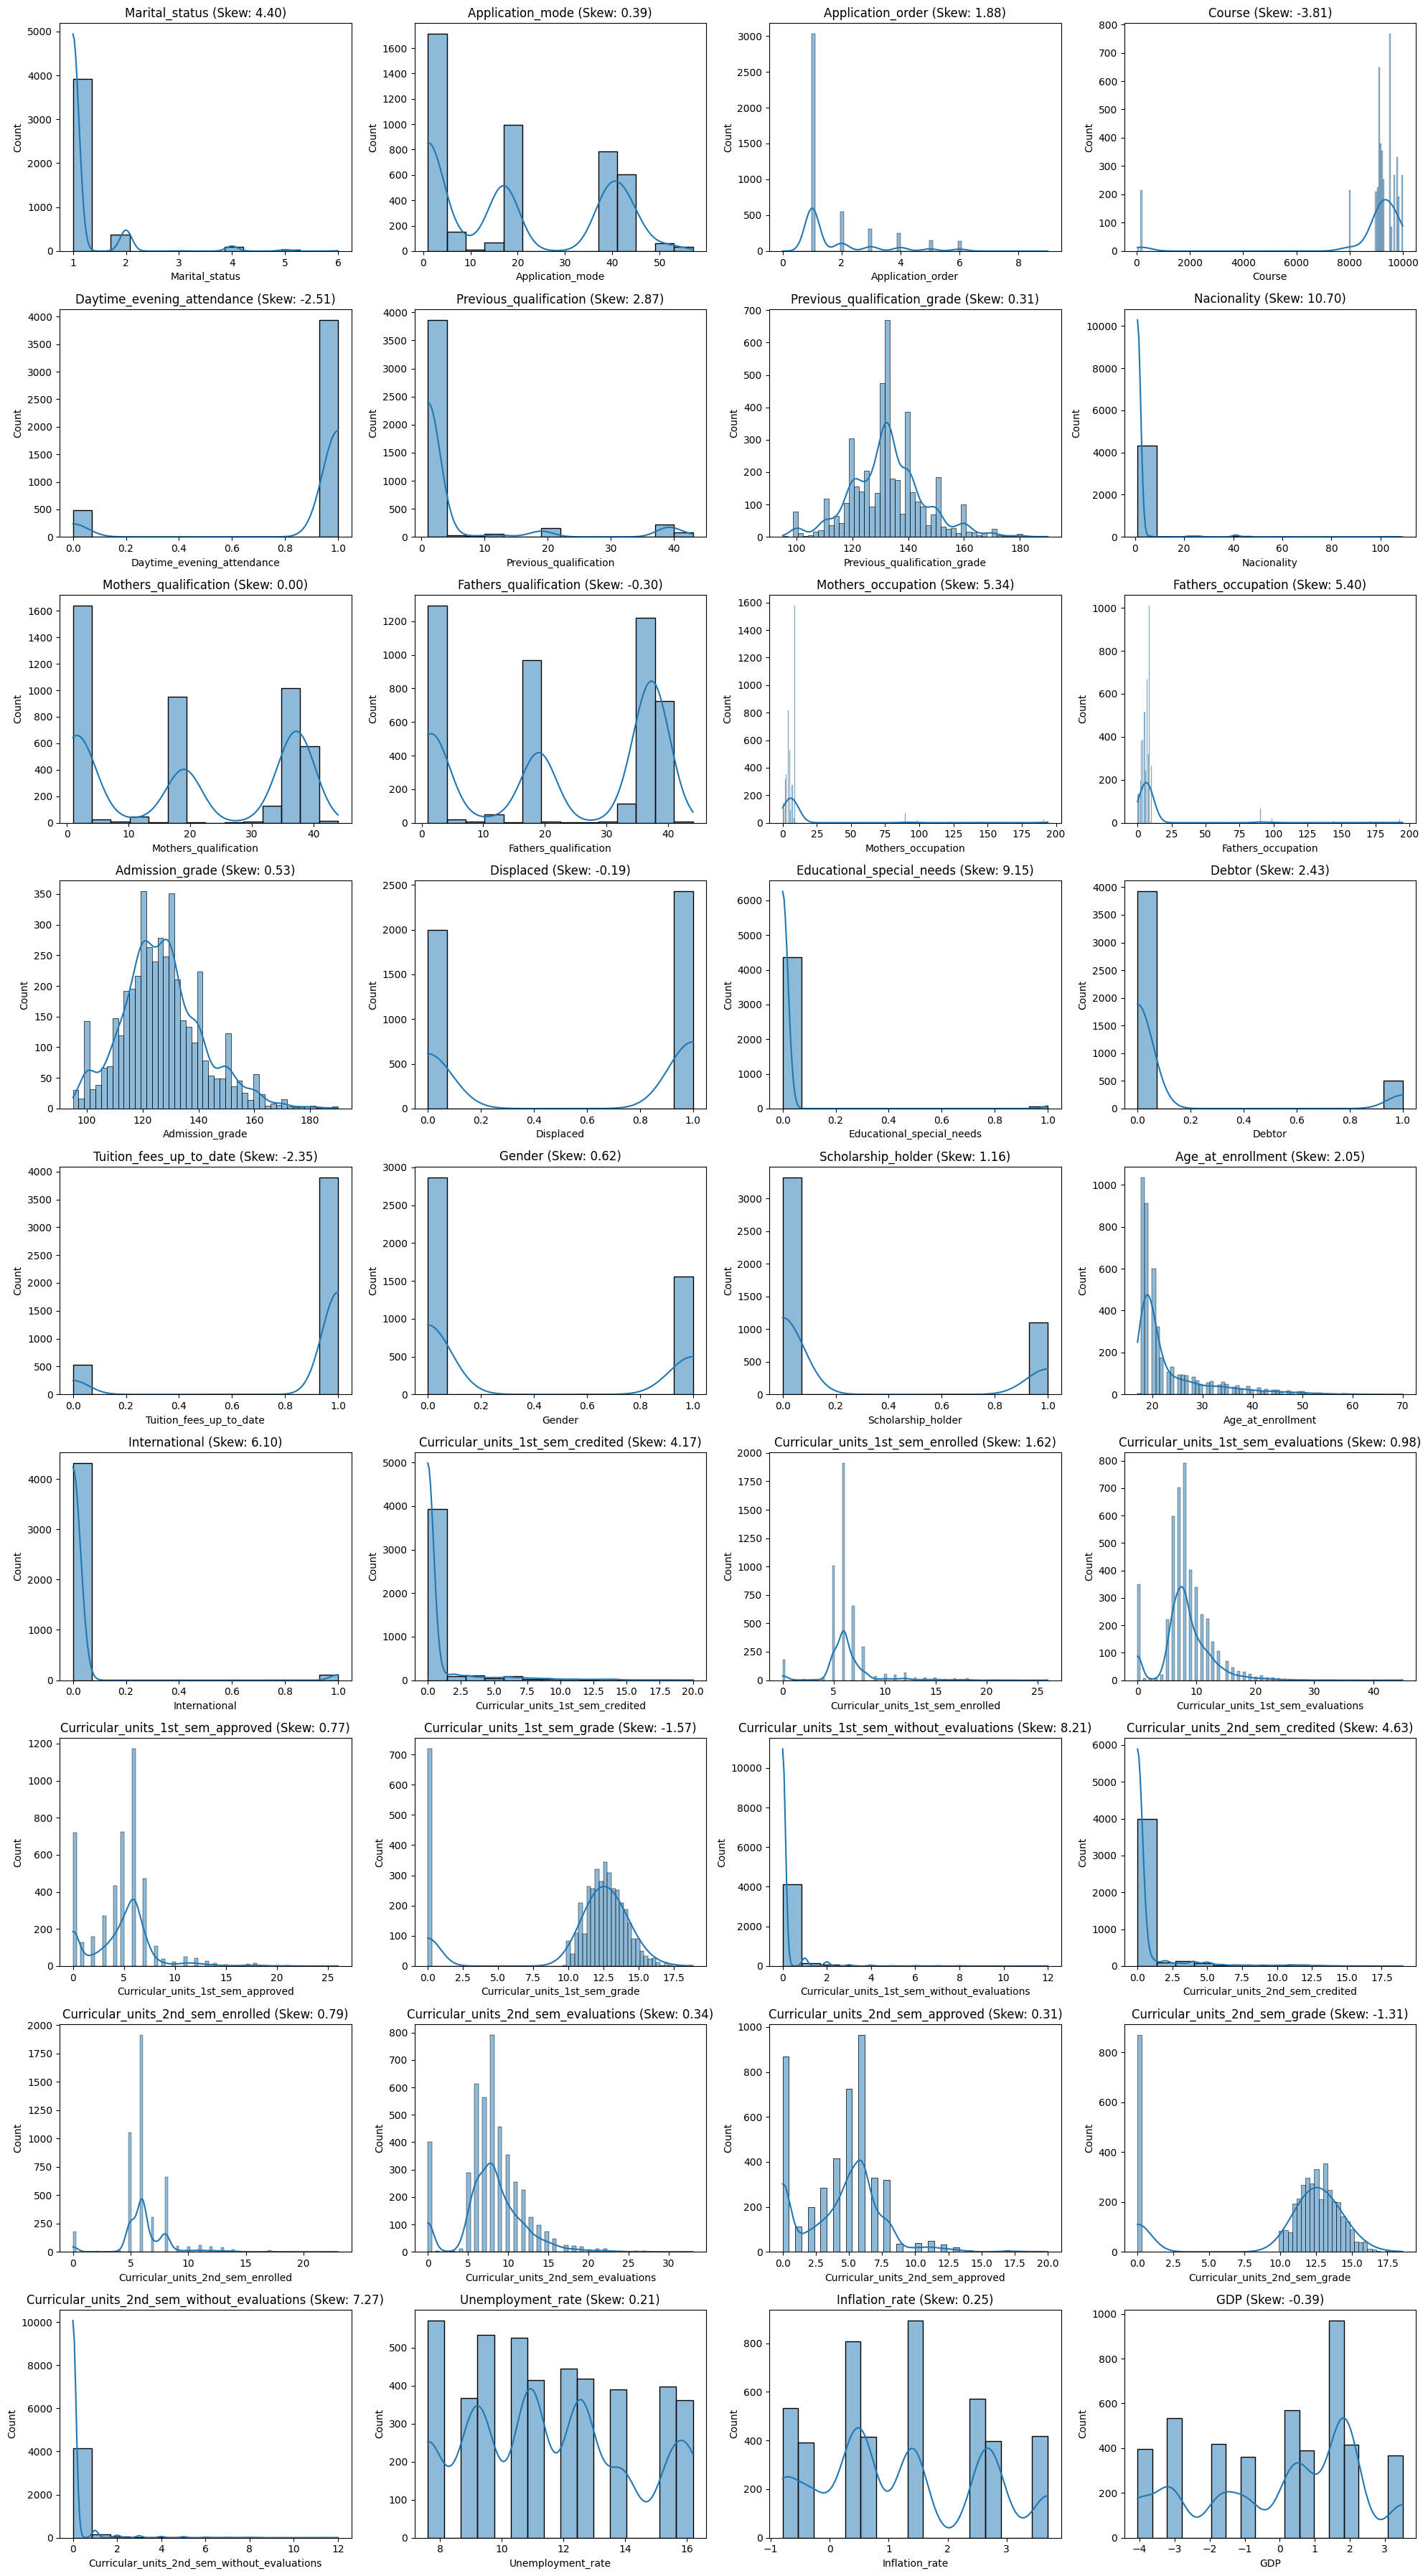

In [ ]:
# Visualisasi distribusi
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} (Skew: {df[col].skew():.2f})')
plt.tight_layout()
plt.show()

Banyak fitur dengan distribusi sangat menceng ke kanan (positively skewed):

| Fitur                                             | Skewness  |
| ------------------------------------------------- | --------- |
| Nacionality                                       | **10.70** |
| Educational\_special\_needs                       | **9.15**  |
| Curricular\_units\_1st\_sem\_without\_evaluations | **8.21**  |
| Curricular\_units\_2nd\_sem\_without\_evaluations | **7.27**  |
| International                                     | **6.10**  |
| Fathers\_occupation                               | **5.40**  |
| Mothers\_occupation                               | **5.34**  |
| ...                                               | ...       |
| Curricular\_units\_1st\_sem\_grade                | **-1.57** |
| Curricular\_units\_2nd\_sem\_grade                | **-1.31** |
| Tuition\_fees\_up\_to\_date                       | **-2.35** |
| Daytime\_evening\_attendance                      | **-2.51** |
| Course                                            | **-3.81** |


Fitur target dalam proyek ini adalah kolom Status, yang merepresentasikan status akhir mahasiswa. Kategori dalam target ini terdiri dari:

- Dropout: Mahasiswa yang keluar dari universitas sebelum lulus.
- Enrolled: Mahasiswa yang masih aktif dan belum lulus.
- Graduate: Mahasiswa yang telah menyelesaikan studi.

Distribusi target dapat divisualisasikan dengan plot batang sebagai berikut:

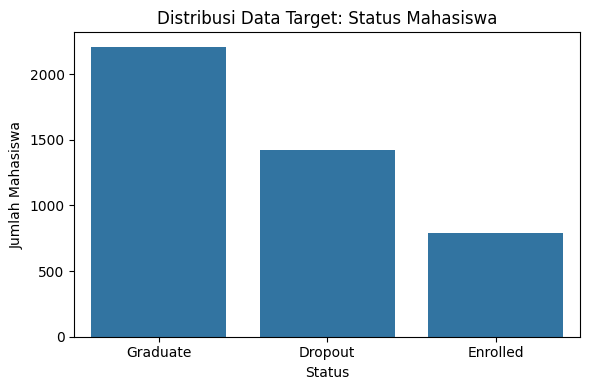

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index)
plt.title('Distribusi Data Target: Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

| Status   | Jumlah | Persentase |
| -------- | ------ | ---------- |
| Graduate | 2875   | 65.0%      |
| Dropout  | 1184   | 26.8%      |
| Enrolled | 365    | 8.2%       |


- Terdapat ketidakseimbangan kelas (class imbalance) yang cukup signifikan.
- Mayoritas mahasiswa berada pada kategori Graduate, sedangkan kategori Enrolled adalah yang paling sedikit.
- Ketidakseimbangan ini penting untuk diperhatikan saat melakukan pelatihan model, karena model dapat cenderung bias terhadap kelas mayoritas jika tidak ditangani.

## 2.7 Pengecekan Outlier

In [ ]:
# Menggunakan IQR
outlier_counts_iqr = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Boolean mask untuk outlier
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_counts_iqr[col] = outliers.sum()

# Tampilkan hasil
outlier_counts_iqr = dict(sorted(outlier_counts_iqr.items(), key=lambda x: x[1], reverse=True))
for k, v in outlier_counts_iqr.items():
    print(f"{k}: {v} outliers")


Scholarship_holder: 1099 outliers
Curricular_units_2nd_sem_grade: 877 outliers
Curricular_units_1st_sem_grade: 726 outliers
Previous_qualification: 707 outliers
Curricular_units_1st_sem_credited: 577 outliers
Application_order: 541 outliers
Curricular_units_2nd_sem_credited: 530 outliers
Tuition_fees_up_to_date: 528 outliers
Marital_status: 505 outliers
Debtor: 503 outliers
Daytime_evening_attendance: 483 outliers
Course: 442 outliers
Age_at_enrollment: 441 outliers
Curricular_units_1st_sem_enrolled: 424 outliers
Curricular_units_2nd_sem_enrolled: 369 outliers
Curricular_units_1st_sem_without_evaluations: 294 outliers
Curricular_units_2nd_sem_without_evaluations: 282 outliers
Mothers_occupation: 182 outliers
Curricular_units_1st_sem_approved: 180 outliers
Previous_qualification_grade: 179 outliers
Fathers_occupation: 177 outliers
Curricular_units_1st_sem_evaluations: 158 outliers
Nacionality: 110 outliers
International: 110 outliers
Curricular_units_2nd_sem_evaluations: 109 outliers
Ad

Beberapa fitur seperti:
- Scholarship_holder (1099 outliers)
- Curricular_units_2nd_sem_grade (877 outliers)
- Curricular_units_1st_sem_grade (726 outliers)
- Previous_qualification (707 outliers)
- Curricular_units_1st_sem_credited (577 outliers)

dan seterusnya memiliki outlier yang cukup besar jumlahnya.

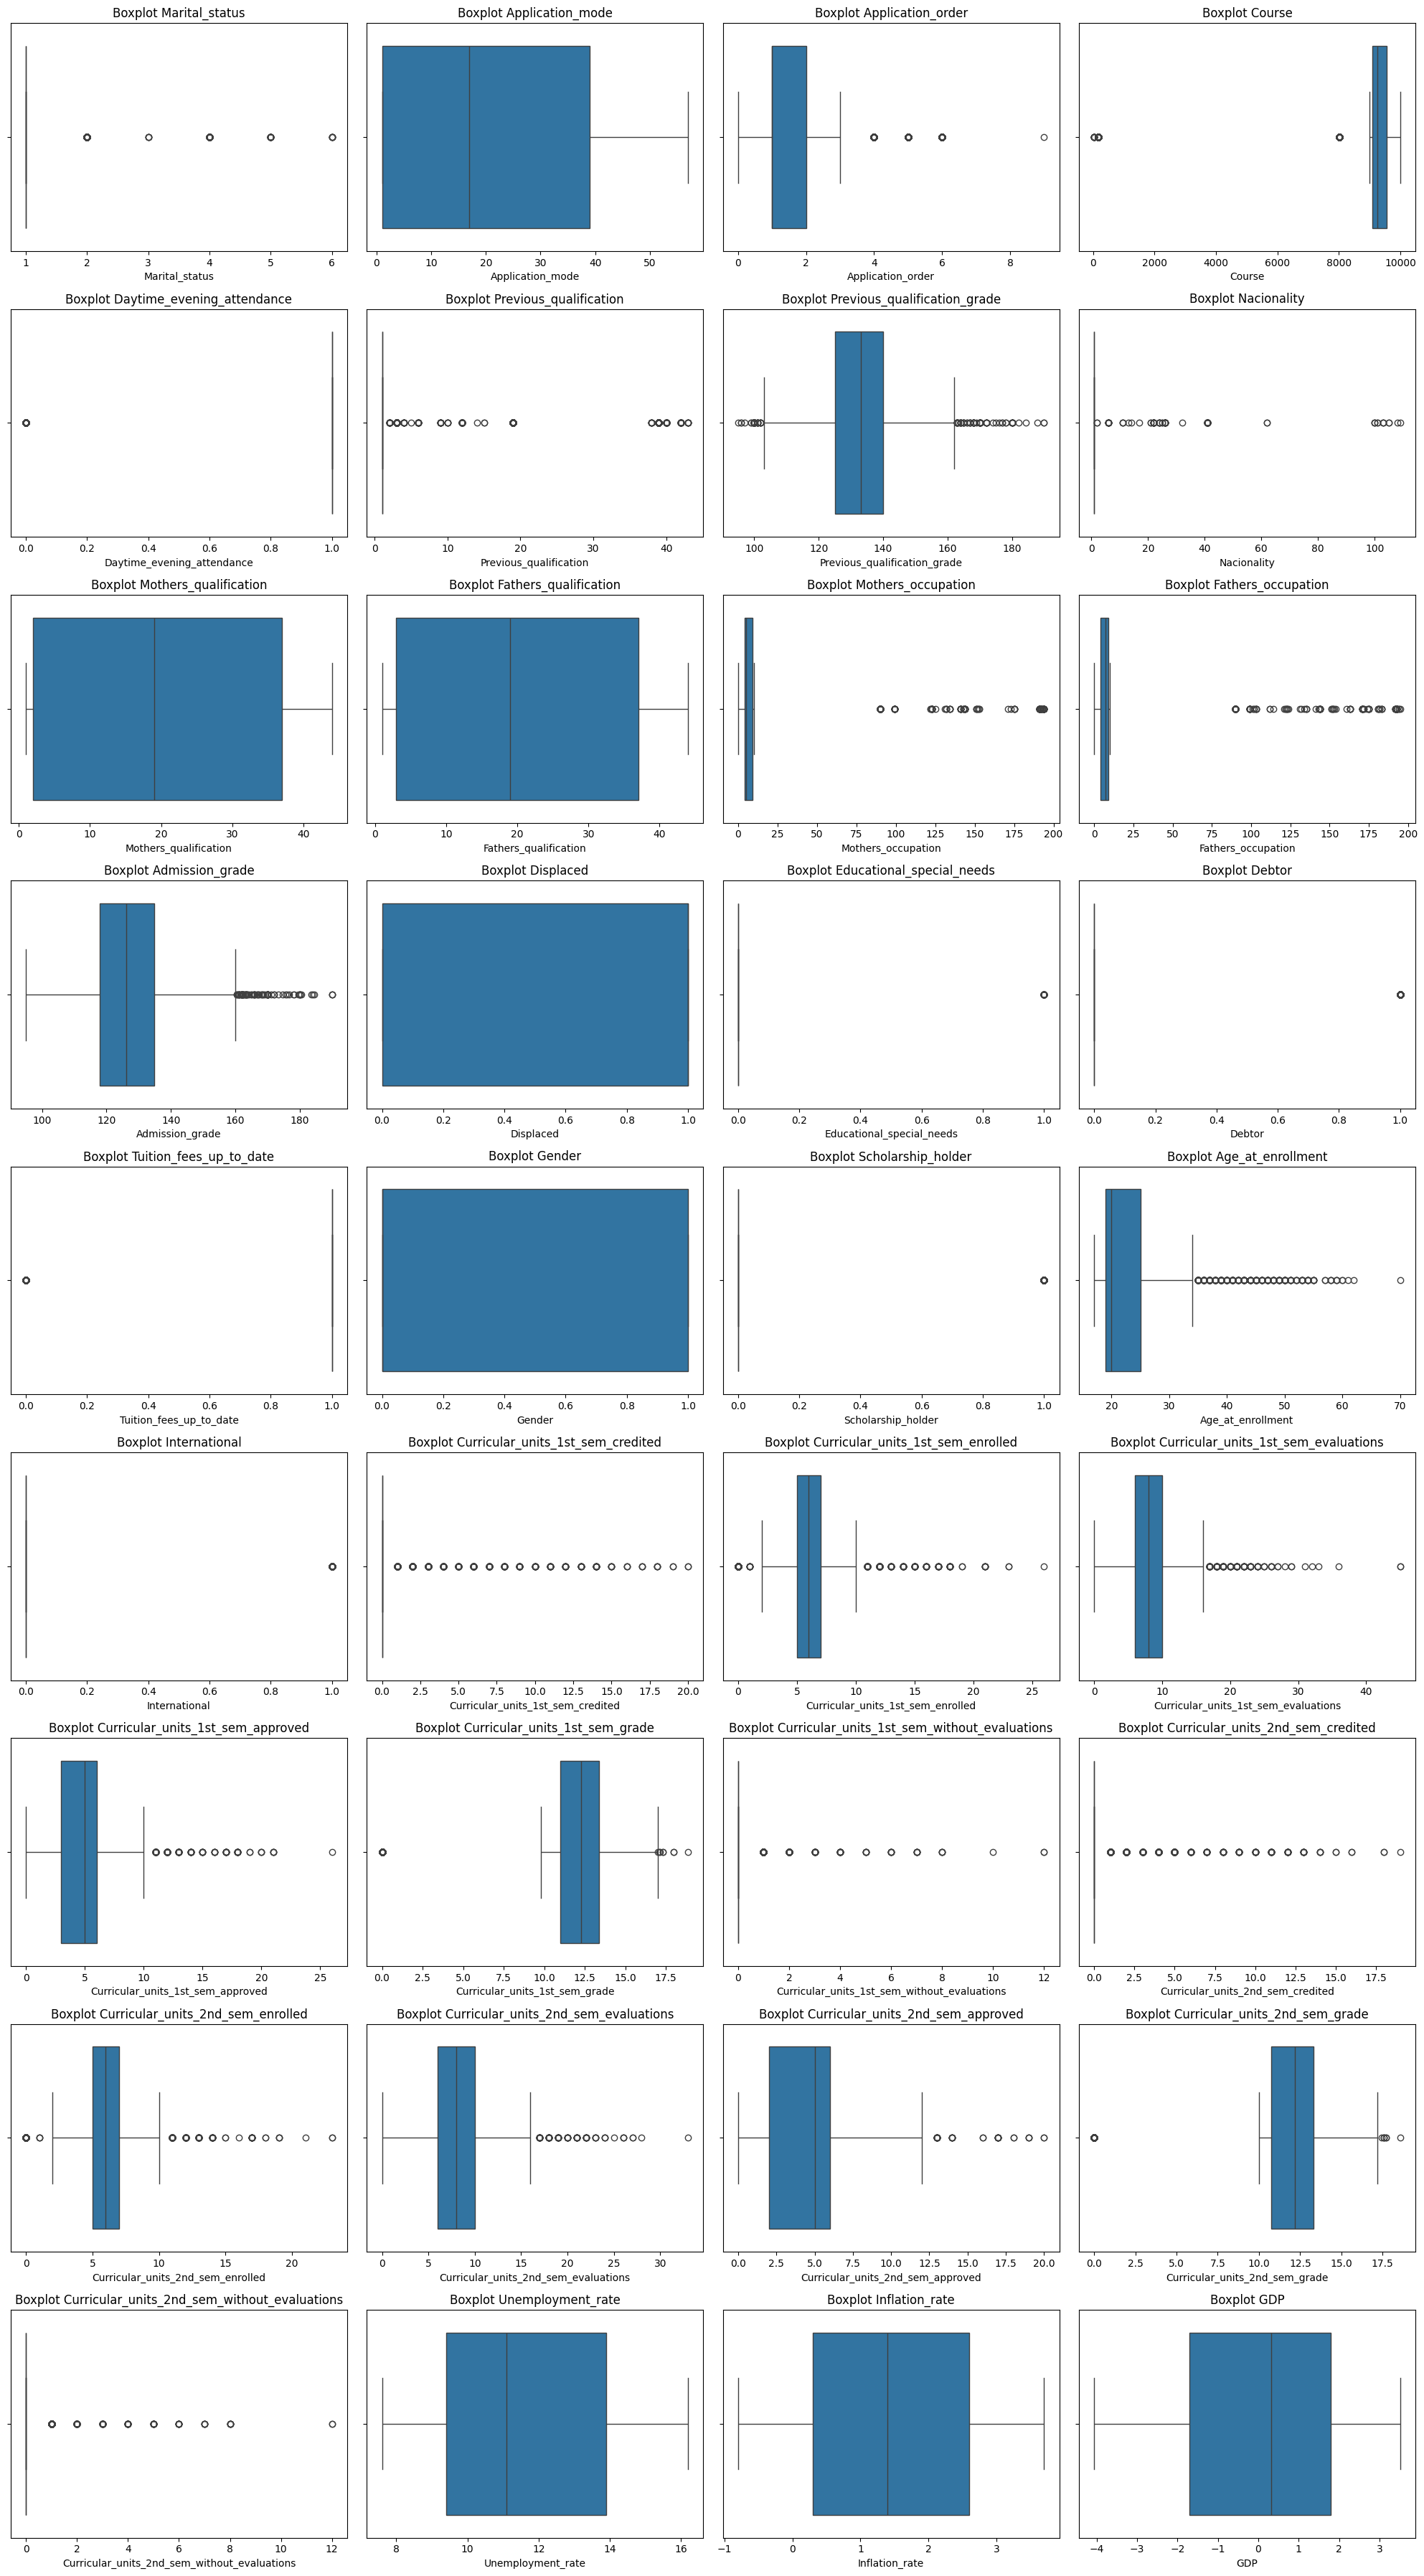

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

## 2.8 Korelasi Data

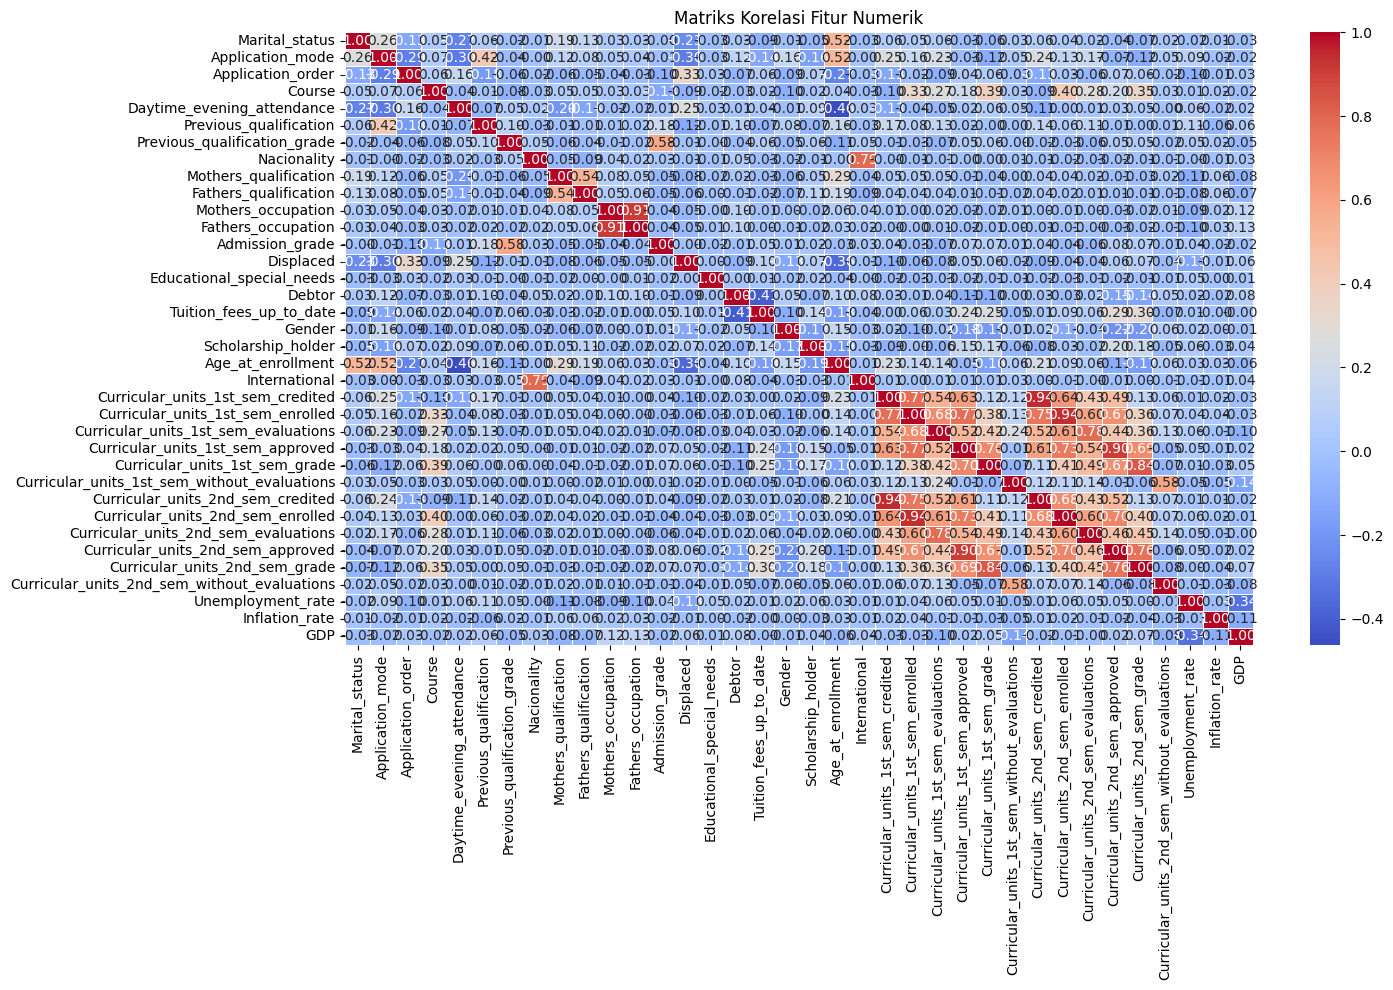

In [ ]:
# Mengambil hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi Pearson
corr_matrix = df_numerik.corr()

# Visualisasi heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

In [ ]:
# Menyaring korelasi kuat (positif maupun negatif)
strong_corr = corr_matrix[(corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)]

# Menampilkan hanya pasangan dengan korelasi kuat
print("Pasangan fitur dengan korelasi kuat (> 0.7 atau < -0.7):")
print(strong_corr.dropna(how='all').dropna(axis=1, how='all').round(2))


Pasangan fitur dengan korelasi kuat (> 0.7 atau < -0.7):
                                      Nacionality  Mothers_occupation  \
Nacionality                                   NaN                 NaN   
Mothers_occupation                            NaN                 NaN   
Fathers_occupation                            NaN                0.91   
International                                0.79                 NaN   
Curricular_units_1st_sem_credited             NaN                 NaN   
Curricular_units_1st_sem_enrolled             NaN                 NaN   
Curricular_units_1st_sem_evaluations          NaN                 NaN   
Curricular_units_1st_sem_approved             NaN                 NaN   
Curricular_units_1st_sem_grade                NaN                 NaN   
Curricular_units_2nd_sem_credited             NaN                 NaN   
Curricular_units_2nd_sem_enrolled             NaN                 NaN   
Curricular_units_2nd_sem_evaluations          NaN                 N

Fitur dengan korelasi kuat > 0.7

| Fitur 1                                | Fitur 2                                | Korelasi |
| -------------------------------------- | -------------------------------------- | -------- |
| `Mothers_occupation`                   | `Fathers_occupation`                   | **0.91** |
| `Curricular_units_1st_sem_credited`    | `Curricular_units_2nd_sem_credited`    | **0.94** |
| `Curricular_units_1st_sem_enrolled`    | `Curricular_units_2nd_sem_enrolled`    | **0.94** |
| `Curricular_units_1st_sem_grade`       | `Curricular_units_2nd_sem_grade`       | **0.84** |
| `Curricular_units_1st_sem_approved`    | `Curricular_units_2nd_sem_approved`    | **0.90** |
| `Curricular_units_1st_sem_enrolled`    | `Curricular_units_1st_sem_approved`    | **0.77** |
| `Curricular_units_2nd_sem_enrolled`    | `Curricular_units_2nd_sem_approved`    | **0.70** |
| `Curricular_units_1st_sem_evaluations` | `Curricular_units_2nd_sem_evaluations` | **0.78** |
| `Curricular_units_1st_sem_credited`    | `Curricular_units_1st_sem_enrolled`    | **0.77** |
| `Curricular_units_1st_sem_approved`    | `Curricular_units_2nd_sem_enrolled`    | **0.73** |
| `International`                        | `Nacionality`                          | **0.79** |


# 3. Data Preparation / Preprocessing

## 3.1 Menangani Missing Values

In [ ]:
print("Jumlah missing values:")
print(df.isnull().sum())

Jumlah missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment          

Karena tidak terdapat missing values, maka tidak dilakukan tindakan apapun.

## 3.2 Menangani Duplikasi Data

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah data duplikat: {duplicate_rows.shape[0]}")

Jumlah data duplikat: 0


Karena tidak terdapat duplikasi, maka tidak dilakukan tindakan apapun.

## 3.3 Penanganan Outlier

In [ ]:
categorical_encoded_cols = [
    'Application_mode', 'Marital_status', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification',
    'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
    'International'
]

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
iqr_target_cols = [col for col in numerical_cols if col not in categorical_encoded_cols]

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_cleaned = df.copy()

In [ ]:
for col in iqr_target_cols:
    before_rows = df_cleaned.shape[0]
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    after_rows = df_cleaned.shape[0]
    print(f"{col}: removed {before_rows - after_rows} rows")

print(f"\nDataset size after outlier removal: {df_cleaned.shape}")

Application_order: removed 541 rows
Previous_qualification_grade: removed 168 rows
Admission_grade: removed 33 rows
Age_at_enrollment: removed 308 rows
Curricular_units_1st_sem_credited: removed 447 rows
Curricular_units_1st_sem_enrolled: removed 335 rows
Curricular_units_1st_sem_evaluations: removed 21 rows
Curricular_units_1st_sem_approved: removed 0 rows
Curricular_units_1st_sem_grade: removed 366 rows
Curricular_units_1st_sem_without_evaluations: removed 120 rows
Curricular_units_2nd_sem_credited: removed 13 rows
Curricular_units_2nd_sem_enrolled: removed 863 rows
Curricular_units_2nd_sem_evaluations: removed 19 rows
Curricular_units_2nd_sem_approved: removed 61 rows
Curricular_units_2nd_sem_grade: removed 8 rows
Curricular_units_2nd_sem_without_evaluations: removed 9 rows
Unemployment_rate: removed 0 rows
Inflation_rate: removed 0 rows
GDP: removed 0 rows

Dataset size after outlier removal: (1112, 37)


In [ ]:
df_cleaned['Status'].value_counts(normalize=True)

,proportion
Status,
Graduate,0.648381
Enrolled,0.178957
Dropout,0.172662


Setelah dilakukan penanganan outlier dengan metode iqr didapatkan hasil yang cukup signifikan.

## 3.4 One-hot Encoding Fitur Kategorikal

In [ ]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Status')

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

Dilakukan One-Hot Encoding terhadap kolom kategorikal agar bisa digunakan oleh algoritma machine learning. Setelah encoding, jumlah fitur meningkat menjadi 44 fitur.

## 3.5 Encoding Target

In [ ]:
le = LabelEncoder()
df_encoded['Status_encoded'] = le.fit_transform(df_cleaned['Status'])

## 3.6 Split Fitur (X) dan Target (Y)

In [ ]:
X = df_encoded.drop(columns=['Status', 'Status_encoded'])
y = df_encoded['Status_encoded']

In [ ]:
# Menyimpan urutan kolom sebelum scaling dan split
with open('columns.json', 'w') as f:
    json.dump(list(X.columns), f)

In [ ]:
# simpan data setelah preprocessing
df_export = pd.concat([X, y], axis=1)
df_export.to_csv('institution_cleaned.csv', index=False)

print("Data berhasil diekspor ke 'institution_cleaned.csv'")

Data berhasil diekspor ke 'institution_cleaned.csv'


## 3.7 Standarisasi Fitur Numerik

In [ ]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

## 3.8 Split Dataset Train dan Test (80:20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Jumlah fitur:", X.shape[1])
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])
print("Distribusi target (train):")
print(y_train.value_counts())

Jumlah fitur: 36
Jumlah data latih: 889
Jumlah data uji: 223
Distribusi target (train):
Status_encoded
2    576
1    159
0    154
Name: count, dtype: int64


- Dataset setelah preprocessing (encoding, scaling, dan outlier handling) memiliki 36 kolom fitur prediktor yang akan digunakan untuk memprediksi target (Status_encoded).
- Data latih (training set): 889 baris (≈ 80%)
- Data uji (testing set): 223 baris (≈ 20%)

| Status (encoded) | Arti     | Jumlah | Proporsi (%) |
| ---------------- | -------- | ------ | ------------ |
| 2                | Graduate | 576    | 64.8%        |
| 1                | Enrolled | 159    | 17.9%        |
| 0                | Dropout  | 154    | 17.3%        |


- Distribusi target sangat tidak seimbang (imbalance).
- Kelas Graduate (2) mendominasi (hampir 65%).
- Kelas Dropout (0) dan Enrolled (1) hanya sekitar 17% masing-masing.

## 3.9 Penanganan Imbalance SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) untuk mengatasi ketidakseimbangan kelas pada variabel target.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Distribusi target (train setelah SMOTE):")
print(Counter(y_train_resampled))

Distribusi target (train setelah SMOTE):
Counter({1: 576, 2: 576, 0: 576})


SMOTE berhasil menyamakan jumlah data untuk tiap kelas menjadi:
- Kelas 0 (Dropout): 576 sampel
- Kelas 1 (Enrolled): 576 sampel
- Kelas 2 (Graduate): 576 sampel



> Sebelum SMOTE:

Model berpotensi bias ke kelas mayoritas (Graduate) karena distribusi target tidak seimbang.

> Sesudah SMOTE:

Setiap kelas memiliki bobot yang setara selama proses pelatihan.

Ini membantu model:
- Belajar pola dari kelas minoritas.
- Mengurangi risiko underfitting pada kelas kecil (Dropout, Enrolled).
- Meningkatkan recall atau f1-score pada kelas minoritas.

# 4. Modeling

## 4.1 Logistic Regression
set max_iter=1000 untuk memastikan konvergensi model saat dataset besar atau banyak fitur.

In [ ]:
# Inisiasi Model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
# Training Model
logreg_model.fit(X_train_resampled, y_train_resampled)
# Prediksi Data Uji
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Confusion Matrix:
[[ 19  13   6]
 [ 17  16   7]
 [  4  28 113]]


Baris = kelas sebenarnya, Kolom = prediksi model.

| Kelas (Aktual)   | True Positive | Salah → Dropout | Salah → Enrolled | Salah → Graduate | Total |
| ---------------- | ------------- | --------------- | ---------------- | ---------------- | ----- |
| **Dropout (0)**  | 19            | —               | 13               | 6                | 38    |
| **Enrolled (1)** | 16            | 17              | —                | 7                | 40    |
| **Graduate (2)** | 113           | 4               | 28               | —                | 145   |


- Kelas 0 (Dropout):
  - 19 benar diklasifikasikan (True Positive)
  - 13 salah diklasifikasikan sebagai Enrolled
  - 6 salah diklasifikasikan sebagai Graduate

- Kelas 1 (Enrolled):
  - 16 benar diklasifikasikan
  - 17 salah sebagai Dropout
  - 7 salah sebagai Graduate

- Kelas 2 (Graduate):
  - 113 benar diklasifikasikan
  - 28 salah sebagai Enrolled
  - 4 salah sebagai Dropout

Model sangat baik dalam mengenali kelas Graduate, tetapi kesulitan membedakan antara Dropout dan Enrolled.

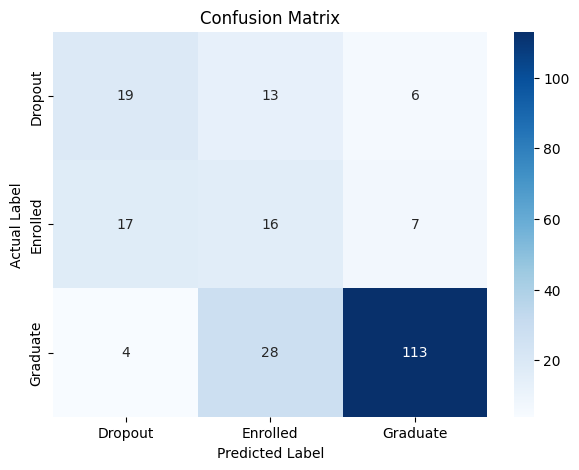

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)
labels = ['Dropout', 'Enrolled', 'Graduate']

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.49        38
           1       0.28      0.40      0.33        40
           2       0.90      0.78      0.83       145

    accuracy                           0.66       223
   macro avg       0.55      0.56      0.55       223
weighted avg       0.71      0.66      0.68       223



| Kelas            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| **Dropout (0)**  | 0.47      | 0.50   | 0.49     | 38      |
| **Enrolled (1)** | 0.28      | 0.40   | 0.33     | 40      |
| **Graduate (2)** | 0.90      | 0.78   | 0.83     | 145     |
| **Macro Avg**    | 0.55      | 0.56   | 0.55     |         |
| **Weighted Avg** | 0.71      | 0.66   | 0.68     |         |


- Precision Graduate tinggi (0.90), artinya model jarang salah memprediksi Graduate.
- Recall Graduate juga cukup baik (0.78), menunjukkan banyak data Graduate berhasil dikenali.
- F1-Score tertinggi pada Graduate, tapi jauh lebih rendah di kelas Dropout & Enrolled.
- Macro Average menunjukkan ketidakseimbangan performa antar kelas (karena memperlakukan semua kelas setara).
- Weighted Average lebih tinggi karena kelas Graduate dominan.

In [ ]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))


Accuracy Score:
0.6636771300448431


Model benar dalam 66,4% kasus pada data uji. Mengingat ketidakseimbangan kelas (Graduate lebih dominan), maka nilai ini bisa dikatakan cukup baik.



In [ ]:
y_proba = logreg_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"Multiclass ROC AUC Score: {auc:.4f}")

Multiclass ROC AUC Score: 0.7981


Nilai AUC ini cukup tinggi dan menunjukkan bahwa model cukup mampu membedakan antar kelas dalam probabilitas prediksi.

## 4.2 Random Forest

n_estimators=100 berarti model akan membangun 100 pohon keputusan. Ini nilai default yang seimbang untuk performa dan waktu proses.

In [ ]:
# Inisiasi Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# Training Model
rf_model.fit(X_train_resampled, y_train_resampled)
# Prediksi Data Uji
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[ 19   9  10]
 [ 12  15  13]
 [  0  22 123]]


| Predicted \ Actual | 0 (Dropout) | 1 (Enrolled) | 2 (Graduate) |
| ------------------ | ----------- | ------------ | ------------ |
| **0 (Dropout)**    | 19          | 9            | 10           |
| **1 (Enrolled)**   | 12          | 15           | 13           |
| **2 (Graduate)**   | 0           | 22           | 123          |



- Model mampu memprediksi kelas 2 (Graduate) dengan cukup baik: 123 dari 145 benar, tapi ada 22 yang salah diklasifikasikan sebagai kelas 1 (Enrolled).
- Untuk kelas 0 (Dropout) dan kelas 1 (Enrolled), prediksinya kurang optimal, banyak salah prediksi silang antara dua kelas ini.
- Contohnya, dari 38 data aktual Dropout, 19 tepat terdeteksi, tapi 9 salah ke kelas 1 dan 10 salah ke kelas 2. Dari 40 data Enrolled, hanya 15 benar, sisanya tersebar ke kelas 0 dan 2.

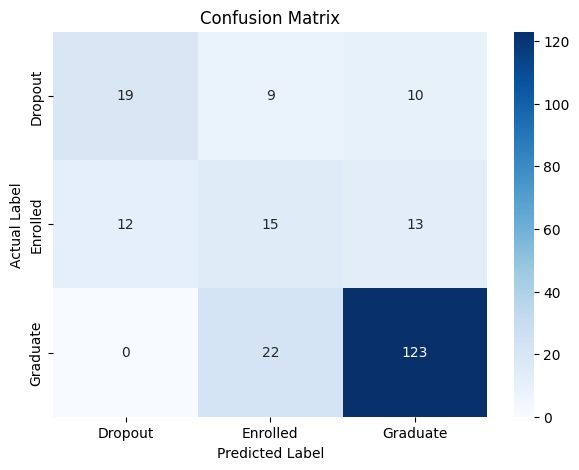

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Dropout', 'Enrolled', 'Graduate']

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        38
           1       0.33      0.38      0.35        40
           2       0.84      0.85      0.85       145

    accuracy                           0.70       223
   macro avg       0.59      0.57      0.58       223
weighted avg       0.71      0.70      0.71       223



| Kelas | Precision | Recall | F1-score | Support (jumlah data aktual) |
| ----- | --------- | ------ | -------- | ---------------------------- |
| 0     | 0.61      | 0.50   | 0.55     | 38                           |
| 1     | 0.33      | 0.38   | 0.35     | 40                           |
| 2     | 0.84      | 0.85   | 0.85     | 145                          |


- Precision kelas 2 tinggi (0.84), artinya dari semua prediksi kelas 2, 84% benar.
- Recall kelas 2 juga tinggi (0.85), berarti model dapat menangkap 85% data kelas 2 sebenarnya.
- Untuk kelas 0 dan 1, nilai precision dan recall masih rendah, menunjukkan model kesulitan membedakan antara Dropout dan Enrolled.
- F1-score rata-rata makro (tidak memperhitungkan proporsi kelas) sekitar 0.58, dan weighted average (memperhitungkan jumlah tiap kelas) sekitar 0.71.
- Akurasi total model adalah 70.4%, cukup baik untuk dataset dengan distribusi target seperti ini.

In [ ]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))


Accuracy Score:
0.7040358744394619


Akurasi model sebesar 70.4% artinya dari seluruh data uji (223), sekitar 156 data berhasil diprediksi dengan benar.

In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='weighted')
print("Multiclass ROC AUC Score:", round(roc_score, 4))

Multiclass ROC AUC Score: 0.863


Skor ROC AUC sebesar 0.863 menunjukkan model memiliki kemampuan yang baik untuk membedakan antar kelas yang berarti secara probabilitas model cukup baik dalam memisahkan kelas meskipun prediksi labelnya kurang sempurna di kelas minoritas (Dropout dan Enrolled).

In [ ]:
# Feature Importances
importances = rf_model.feature_importances_

feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Urutkan berdasarkan importance terbesar
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

# Menampilkan 10 fitur teratas
print(feat_importances.head(10))

                                 feature  importance
30     Curricular_units_2nd_sem_approved    0.138137
24     Curricular_units_1st_sem_approved    0.072413
29  Curricular_units_2nd_sem_evaluations    0.068574
25        Curricular_units_1st_sem_grade    0.057542
31        Curricular_units_2nd_sem_grade    0.048935
23  Curricular_units_1st_sem_evaluations    0.048058
12                       Admission_grade    0.044031
3                                 Course    0.042997
6           Previous_qualification_grade    0.041263
11                    Fathers_occupation    0.040369


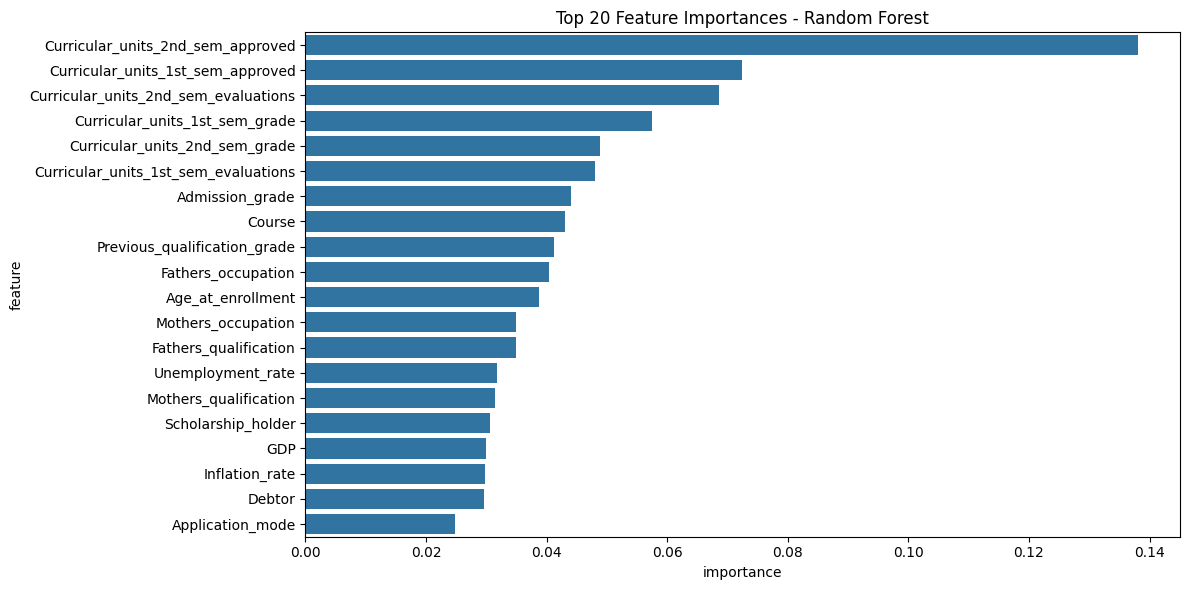

In [ ]:
# Visualisasi dengan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feat_importances.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

- Curricular_units_2nd_sem_approved dan Curricular_units_1st_sem_approved: Menandakan jumlah mata kuliah yang berhasil diselesaikan, jelas sangat krusial untuk status mahasiswa (graduate/enrolled/dropout).
- Curricular_units_2nd_sem_evaluations dan Curricular_units_1st_sem_evaluations: Banyaknya evaluasi yang diikuti juga mempengaruhi performa dan kelulusan.
- Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade: Nilai semester jelas penting.
- Admission_grade dan Previous_qualification_grade: Nilai awal atau kualifikasi sebelumnya yang biasanya berpengaruh pada performa akademik.
- Course dan Fathers_occupation: Kursus yang diambil dan latar belakang sosial ekonomi ayah juga tampak berkontribusi.

## Insight singkat:
- Akademik (nilai dan kelulusan mata kuliah) adalah faktor paling dominan dalam menentukan status mahasiswa.
- Faktor latar belakang seperti jenis kursus dan pekerjaan orang tua juga berpengaruh, mungkin terkait dukungan ekonomi atau sosial.

# 5. Evaluation

Evaluasi dilakukan untuk mengukur performa dua model klasifikasi **Logistic Regression** dan **Random Forest Classifier** dalam memprediksi status mahasiswa, khususnya pada kelas minoritas (misal, Dropout dan Enrolled), karena kesalahan prediksi pada kelas-kelas ini bisa berdampak pada intervensi dan pengambilan keputusan pendidikan.

## 5.1 Metode Evaluasi Model

- Confusion Matrix: Untuk melihat distribusi prediksi benar dan salah per kelas.
- Accuracy: Proporsi prediksi benar dari total data.
- Precision, Recall, F1-score per kelas:
  - Precision = Akurasi prediksi positif (berapa banyak prediksi positif yang benar)
  - Recall = Sensitivitas (berapa banyak kasus positif yang berhasil dideteksi)
  - F1-score = Harmonic mean precision dan recall, jadi metrik keseimbangan
- Macro & Weighted Averages: Rata-rata metrik untuk mengukur performa keseluruhan tanpa dan dengan memperhatikan distribusi kelas.
- Multiclass ROC AUC: Mengukur kemampuan model membedakan kelas secara keseluruhan.

## 5.2 Hasil Evaluasi

### 1. Logistic Regression

| Kelas (Aktual)   | True Positive | Salah → Dropout | Salah → Enrolled | Salah → Graduate | Total |
| ---------------- | ------------- | --------------- | ---------------- | ---------------- | ----- |
| **Dropout (0)**  | 19            | —               | 13               | 6                | 38    |
| **Enrolled (1)** | 16            | 17              | —                | 7                | 40    |
| **Graduate (2)** | 113           | 4               | 28               | —                | 145   |


Model sangat baik dalam mengenali kelas Graduate, tetapi kesulitan membedakan antara Dropout dan Enrolled.

| Metrik              | Nilai      |
| ------------------- | ---------- |
| Accuracy            | **66%**    |
| Precision (class 1) | 0.28       |
| Recall (class 1)    | 0.40       |
| F1-score (class 1)  | 0.33       |
| ROC AUC Score       | **0.7981** |


- Model mampu mengenali mahasiswa yang graduate dengan cukup baik.
- Kesulitan mendeteksi mahasiswa yang enrolled dan dropout dengan baik (kelas minoritas).
- Model ini cocok sebagai baseline, tapi masih perlu perbaikan pada deteksi kelas minoritas.

### 2. Random Forest

| Predicted \ Actual | 0 (Dropout) | 1 (Enrolled) | 2 (Graduate) |
| ------------------ | ----------- | ------------ | ------------ |
| **0 (Dropout)**    | 19          | 9            | 10           |
| **1 (Enrolled)**   | 12          | 15           | 13           |
| **2 (Graduate)**   | 0           | 22           | 123          |


Model mampu memprediksi kelas 2 (Graduate) dengan cukup baik: 123 dari 145 benar, tapi ada 22 yang salah diklasifikasikan sebagai kelas 1 (Enrolled).


| Metrik              | Nilai      |
| ------------------- | ---------- |
| Accuracy            | **70%**    |
| Precision (class 1) | 0.33       |
| Recall (class 1)    | 0.38       |
| F1-score (class 1)  | 0.35       |
| ROC AUC Score       | **0.8630** |

- Random Forest lebih baik dalam mendeteksi kelas minoritas.
- Peningkatan akurasi dan ROC AUC menunjukkan model lebih robust.
- Masih ada ruang perbaikan, khususnya pada kelas enrolled.

## 5.3 Kesimpulan

Berdasarkan hasil analisis dan pemodelan terhadap data institusi pendidikan Jaya Jaya Maju, didapatkan bahwa:

1. Distribusi status mahasiswa tidak seimbang, dengan proporsi mahasiswa yang Graduate (64.8%), Enrolled (17.9%), dan Dropout (17.3%). Hal ini menandakan bahwa sebagian besar mahasiswa berhasil menyelesaikan studinya, namun tetap terdapat kelompok signifikan yang mengalami putus kuliah atau masih terdaftar.

2. Beberapa fitur utama yang berkontribusi signifikan terhadap prediksi status mahasiswa berdasarkan feature importance dari model Random Forest adalah:
- Curricular_units_2nd_sem_approved → Jumlah mata kuliah semester 2 yang disetujui menunjukkan pengaruh terbesar terhadap keberhasilan mahasiswa.
- Curricular_units_1st_sem_approved dan Curricular_units_2nd_sem_evaluations → Tingkat keterlibatan dan performa akademik sejak awal menjadi indikator penting.
- Admission_grade → Nilai saat masuk perguruan tinggi juga memengaruhi potensi kelulusan.
- Faktor sosio-ekonomi seperti Fathers_occupation dan Previous_qualification_grade turut memberikan pengaruh terhadap status akhir mahasiswa.

3. Model prediktif terbaik menggunakan Random Forest dengan penyeimbangan data SMOTE, memberikan hasil sebagai berikut:
- Accuracy: 70.4%
- Recall untuk kelas Dropout: 50%
- Recall untuk kelas Enrolled: 38%
- Recall untuk kelas Graduate: 85%
- ROC AUC Score (multiclass): 0.8630

  Model ini cukup andal dalam mendeteksi mahasiswa yang berpotensi lulus, namun performa pada kelas Dropout dan Enrolled masih perlu ditingkatkan, terutama mengingat pentingnya intervensi dini terhadap mahasiswa yang berisiko putus kuliah.



## 5.4 Rekomendasi Tindakan

1. Fokus pada Mahasiswa Risiko Tinggi (Dropout dan Enrolled)
  - Manfaatkan model prediktif untuk mengidentifikasi mahasiswa yang berisiko tinggi sejak semester awal.
  - Terapkan program pendampingan akademik dan konseling khusus bagi mahasiswa dengan prediksi Dropout.

2. Intervensi Dini Berdasarkan Performa Akademik
  - Pantau dan analisis metrik seperti:
    - Jumlah mata kuliah yang diambil dan disetujui.
    - Jumlah evaluasi atau ujian yang diikuti.
    - Nilai akademik di semester 1 dan 2.
  - Mahasiswa yang tidak aktif mengikuti evaluasi atau memiliki performa rendah perlu diberi perhatian lebih dan dihubungi untuk asesmen kebutuhan dukungan.

3. Peningkatan Seleksi Masuk dan Persiapan Awal
  - Gunakan Admission Grade dan Previous Qualification Grade sebagai indikator kesiapan akademik.
  - Bagi calon mahasiswa dengan nilai rendah, pertimbangkan menyediakan kelas tambahan/pembekalan atau program pembinaan sebelum masa kuliah dimulai.

4. Pertimbangkan Latar Belakang Sosial Mahasiswa
  - Variabel seperti pekerjaan orang tua menunjukkan keterkaitan dengan keberhasilan akademik.
  - Menyediakan dukungan finansial, beasiswa, atau fasilitas tambahan bagi mahasiswa dari latar belakang sosial-ekonomi rendah.

## 6. Script Prediksi

### 6.1 Menyimpan Model dan Scaler

In [ ]:
# Simpan model dan scaler
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### 6.2 Fungsi Prediksi

In [ ]:
def predict_student_status(input_data):
    # Load model dan scaler
    model = joblib.load('rf_model.pkl')
    scaler = joblib.load('scaler.pkl')

    with open('columns.json', 'r') as f:
        columns = json.load(f)

    label_map = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

    # Konversi input ke DataFrame
    df_input = pd.DataFrame([input_data])
    df_input = pd.get_dummies(df_input)

    # Pastikan semua kolom ada
    for col in columns:
        if col not in df_input:
            df_input[col] = 0
    df_input = df_input[columns]

    # Scaling
    df_scaled = scaler.transform(df_input)

    # Prediksi
    pred = model.predict(df_input)
    proba = model.predict_proba(df_input)[0]

    label_pred = label_map[int(pred[0])]
    proba_dict = {label_map[i]: f"{p:.2%}" for i, p in enumerate(proba)}

    return {
        "Prediksi": label_pred,
        "Probabilitas": proba_dict
    }


In [ ]:
def tampilkan_hasil_prediksi(prediksi: str, probabilitas: dict):
    print("===== HASIL PREDIKSI STATUS MAHASISWA =====")
    print(f"Prediksi Status  : {prediksi}")
    print("Probabilitas Kelas:")
    for label, prob in probabilitas.items():
        print(f"  - {label:<9}: {prob}")

In [ ]:
sample_student = {
    'Age': 20,
    'Gender': 'female',
    'Marital_status': 'single',
    'Application_mode': 1,
    'Application_order': 1,
    'Course': 'Nursing',
    'Daytime_evening_attendance': 'daytime',
    'Previous_qualification': 'secondary education',
    'Previous_qualification_grade': 145.0,
    'Nacionality': 'Portugal',
    'Mothers_occupation': 'services',
    'Fathers_occupation': 'technical',
    'Admission_grade': 160.0,
    'Displaced': 'no',
    'Educational_special_needs': 'no',
    'Debtor': 'no',
    'Tuition_fees_up_to_date': 'yes',
    'Scholarship_holder': 'no',
    'International': 'no',
    'Curricular_units_1st_sem_enrolled': 6,
    'Curricular_units_1st_sem_approved': 5,
    'Curricular_units_1st_sem_grade': 13.5,
    'Curricular_units_1st_sem_evaluations': 6,
    'Curricular_units_2nd_sem_enrolled': 6,
    'Curricular_units_2nd_sem_approved': 5,
    'Curricular_units_2nd_sem_grade': 14.0,
    'Curricular_units_2nd_sem_evaluations': 5,
    'Unemployment_rate': 6.5,
    'Inflation_rate': 1.2,
    'GDP': 1.8
}


hasil = predict_student_status(sample_student)
tampilkan_hasil_prediksi(hasil['Prediksi'], hasil['Probabilitas'])

===== HASIL PREDIKSI STATUS MAHASISWA =====
Prediksi Status  : Graduate
Probabilitas Kelas:
  - Dropout  : 24.00%
  - Enrolled : 27.00%
  - Graduate : 49.00%
